# Lab07
- Brian Carrillo
- Josué Morales
- Carlos López
- Marco Ramírez

### Ejercicio 04

In [1]:
import numpy as np

def backtracking_line_search(f, df, xk, pk, alpha=1, rho=0.5, c=1e-4):
    """
    Backtracking line search to find a suitable step size.
    
    Parameters:
    - f: objective function
    - df: gradient of the objective function
    - xk: current point
    - pk: search direction
    - alpha: initial step size
    - rho: factor to decrease alpha
    - c: constant for Armijo condition
    
    Returns:
    - alpha: suitable step size
    """
    fk = f(xk)
    gk = df(xk)
    while f(xk + alpha * pk) > fk + c * alpha * np.dot(gk, pk):
        alpha *= rho
    return alpha

def naive_gradient_descent_random_direction(f, df, x0, alpha, maxIter, tol, stopping_criterion=None):
    """
    Naive gradient descent with random descent direction.

    Parameters:
    - f: Objective function.
    - df: Gradient of the objective function.
    - x0: Starting point (numpy array).
    - alpha: Step size (positive float).
    - maxIter: Maximum number of iterations (integer).
    - tol: Tolerance for stopping criterion (positive float).
    - stopping_criterion: Function that defines the stopping criterion.

    Returns:
    - x_best: The best solution found (last approximation).
    - xk_list: Sequence of iterations xk.
    - fxk_list: Sequence of values f(xk).
    - error_list: Sequence of errors at each step.
    - num_iters: Number of iterations performed.
    - converged: Boolean indicating whether the method converged.
    """
    xk_list = [x0.copy()]
    fxk_list = [f(x0)]
    error_list = []
    xk = x0.copy()
    converged = False

    for k in range(1, maxIter + 1):
        grad = df(xk)
        # Generate a random unit vector
        p_k = np.random.randn(*xk.shape)
        p_k /= np.linalg.norm(p_k)
        # Ensure it's a descent direction
        while np.dot(p_k, grad) >= 0:
            p_k = np.random.randn(*xk.shape)
            p_k /= np.linalg.norm(p_k)
        # Update xk
        # Inside the main loop, replace the update step with:
        alpha = backtracking_line_search(f, df, xk, p_k)
        xk_new = xk + alpha * p_k
        xk_list.append(xk_new.copy())
        fxk_new = f(xk_new)
        fxk_list.append(fxk_new)
        # Compute error
        error = np.linalg.norm(xk_new - xk)
        error_list.append(error)
        # Check stopping criterion
        if stopping_criterion:
            if stopping_criterion(xk, xk_new, fxk_list[-2], fxk_new, grad, k):
                converged = True
                break
        elif error < tol:
            converged = True
            break
        xk = xk_new

    num_iters = len(xk_list) - 1
    x_best = xk_list[-1]

    return x_best, xk_list, fxk_list, error_list, num_iters, converged


def maximum_naive_descent(f, df, x0, alpha, maxIter, tol, stopping_criterion=None):
    """
    Maximum naive descent (standard gradient descent with constant step size).

    Parameters and returns are the same as in the previous function.
    """
    xk_list = [x0.copy()]
    fxk_list = [f(x0)]
    error_list = []
    xk = x0.copy()
    converged = False

    for k in range(1, maxIter + 1):
        grad = df(xk)
        # Update xk
        alpha = backtracking_line_search(f, df, xk, -grad)
        xk_new = xk + alpha * (-grad)
        xk_list.append(xk_new.copy())
        fxk_new = f(xk_new)
        fxk_list.append(fxk_new)
        # Compute error
        error = np.linalg.norm(xk_new - xk)
        error_list.append(error)
        # Check stopping criterion
        if stopping_criterion:
            if stopping_criterion(xk, xk_new, fxk_list[-2], fxk_new, grad, k):
                converged = True
                break
        elif error < tol:
            converged = True
            break
        xk = xk_new

    num_iters = len(xk_list) - 1
    x_best = xk_list[-1]

    return x_best, xk_list, fxk_list, error_list, num_iters, converged


def approximate_hessian(df, x, epsilon=1e-5):
    """
    Approximates the Hessian matrix using finite differences.

    Parameters:
    - df: Gradient function.
    - x: Point at which to approximate the Hessian.
    - epsilon: Small perturbation for finite differences.

    Returns:
    - H: Approximated Hessian matrix.
    """
    n = x.shape[0]
    H = np.zeros((n, n))
    df_x = df(x)
    for i in range(n):
        x_eps = x.copy()
        x_eps[i] += epsilon
        df_x_eps = df(x_eps)
        H[:, i] = (df_x_eps - df_x) / epsilon
    return H


def newton_gradient_descent_approx_hessian(f, df, x0, alpha, maxIter, tol, stopping_criterion=None):
    """
    Newton gradient descent with approximate Hessian.

    Parameters and returns are the same as in the first function.
    """
    xk_list = [x0.copy()]
    fxk_list = [f(x0)]
    error_list = []
    xk = x0.copy()
    converged = False

    for k in range(1, maxIter + 1):
        grad = df(xk)
        # Approximate Hessian
        H_approx = approximate_hessian(df, xk)
        try:
            # Compute direction
            delta_xk = -alpha * np.linalg.solve(H_approx, grad)
        except np.linalg.LinAlgError:
            # If Hessian is singular, use gradient descent step
            delta_xk = -alpha * grad
        # Update xk
        alpha = backtracking_line_search(f, df, xk, delta_xk)
        xk_new = xk + alpha * delta_xk
        xk_list.append(xk_new.copy())
        fxk_new = f(xk_new)
        fxk_list.append(fxk_new)
        # Compute error
        error = np.linalg.norm(xk_new - xk)
        error_list.append(error)
        # Check stopping criterion
        if stopping_criterion:
            if stopping_criterion(xk, xk_new, fxk_list[-2], fxk_new, grad, k):
                converged = True
                break
        elif error < tol:
            converged = True
            break
        xk = xk_new

    num_iters = len(xk_list) - 1
    x_best = xk_list[-1]

    return x_best, xk_list, fxk_list, error_list, num_iters, converged


def newton_gradient_descent_exact_hessian(f, df, ddf, x0, alpha, maxIter, tol, stopping_criterion=None):
    """
    Newton gradient descent with exact Hessian.

    Parameters:
    - ddf: Hessian of the objective function.
    - Other parameters and returns are the same as in the first function.
    """
    xk_list = [x0.copy()]
    fxk_list = [f(x0)]
    error_list = []
    xk = x0.copy()
    converged = False

    for k in range(1, maxIter + 1):
        grad = df(xk)
        Hessian = ddf(xk)
        try:
            # Solve for delta_xk
            delta_xk = -alpha * np.linalg.solve(Hessian, grad)
        except np.linalg.LinAlgError:
            # If Hessian is singular, use gradient descent step
            delta_xk = -alpha * grad
        # Update xk
        alpha = backtracking_line_search(f, df, xk, delta_xk)
        xk_new = xk + alpha * delta_xk
        xk_list.append(xk_new.copy())
        fxk_new = f(xk_new)
        fxk_list.append(fxk_new)
        # Compute error
        error = np.linalg.norm(xk_new - xk)
        error_list.append(error)
        # Check stopping criterion
        if stopping_criterion:
            if stopping_criterion(xk, xk_new, fxk_list[-2], fxk_new, grad, k):
                converged = True
                break
        elif error < tol:
            converged = True
            break
        xk = xk_new

    num_iters = len(xk_list) - 1
    x_best = xk_list[-1]

    return x_best, xk_list, fxk_list, error_list, num_iters, converged


### Ejercicio 05

In [3]:
import numpy as np

# Function (a)
def f_a(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df_a(x):
    df_dx0 = 4*x[0]**3 - 4*x[1]
    df_dx1 = 4*x[1]**3 - 4*x[0] + 0.5
    return np.array([df_dx0, df_dx1])

def ddf_a(x):
    ddf_dx0dx0 = 12*x[0]**2
    ddf_dx0dx1 = -4
    ddf_dx1dx0 = -4
    ddf_dx1dx1 = 12*x[1]**2
    return np.array([[ddf_dx0dx0, ddf_dx0dx1], [ddf_dx1dx0, ddf_dx1dx1]])

# Function (b) - Rosenbrock 2D
def f_b(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def df_b(x):
    df_dx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx0, df_dx1])

def ddf_b(x):
    ddf_dx0dx0 = 1200*x[0]**2 - 400*x[1] + 2
    ddf_dx0dx1 = -400*x[0]
    ddf_dx1dx0 = -400*x[0]
    ddf_dx1dx1 = 200
    return np.array([[ddf_dx0dx0, ddf_dx0dx1], [ddf_dx1dx0, ddf_dx1dx1]])

# Function (c) - Rosenbrock 10D
def f_c(x):
    return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

def df_c(x):
    grad = np.zeros_like(x)
    n = len(x)
    for i in range(n - 1):
        grad[i] = -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        grad[i+1] += 200 * (x[i+1] - x[i]**2)
    return grad

def ddf_c(x):
    n = len(x)
    H = np.zeros((n, n))
    for i in range(n - 1):
        H[i, i] += 1200 * x[i]**2 - 400 * x[i+1] + 2
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]
        H[i+1, i+1] += 200
    return H

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def create_table_and_graphs(methods, f, df, ddf, x0, alpha, maxIter, tol):
    results = []
    for method_name, method_func in methods.items():
        if method_name == "Newton Exact":
            x_best, xk_list, fxk_list, error_list, num_iters, converged = method_func(f, df, ddf, x0, alpha, maxIter, tol)
        else:
            x_best, xk_list, fxk_list, error_list, num_iters, converged = method_func(f, df, x0, alpha, maxIter, tol)
        
        # Prepare data for the table
        first_three = xk_list[:3]
        last_three = xk_list[-3:]
        approx_errors = [np.linalg.norm(x - x_best) for x in first_three + last_three]
        grad_norms = [np.linalg.norm(df(x)) for x in first_three + last_three]
        
        table_data = []
        for i, (x, error, grad_norm) in enumerate(zip(first_three + last_three, approx_errors, grad_norms)):
            iteration = i + 1 if i < 3 else num_iters - 2 + i % 3
            table_data.append([method_name, iteration, x, error, grad_norm])
        
        results.append((method_name, error_list, table_data, xk_list))
    
    # Create and print the table
    all_table_data = [row for _, _, table_data, _ in results for row in table_data]
    print(tabulate(all_table_data, headers=["Method", "Iteration", "x_k", "Approx. Error", "Grad Norm"]))
    
    # Create the convergence graph
    plt.figure(figsize=(10, 6))
    for method_name, error_list, _, _ in results:
        plt.semilogy(range(1, len(error_list) + 1), error_list, label=method_name)
    plt.xlabel("Iteration")
    plt.ylabel("Approximation Error (log scale)")
    plt.title("Comparison of Approximation Errors")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Create the path graph for 2D functions
    if len(x0) == 2:
        plt.figure(figsize=(10, 8))
        
        # Determine the range for the contour plot
        all_points = [point for _, _, _, xk_list in results for point in xk_list]
        x_min, x_max = min(p[0] for p in all_points), max(p[0] for p in all_points)
        y_min, y_max = min(p[1] for p in all_points), max(p[1] for p in all_points)
        
        # Add some padding
        x_range = x_max - x_min
        y_range = y_max - y_min
        x_min -= 0.1 * x_range
        x_max += 0.1 * x_range
        y_min -= 0.1 * y_range
        y_max += 0.1 * y_range
        
        # Create the contour plot
        x = np.linspace(x_min, x_max, 100)
        y = np.linspace(y_min, y_max, 100)
        X, Y = np.meshgrid(x, y)
        Z = np.array([f(np.array([xi, yi])) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
        
        plt.contour(X, Y, Z, levels=20, cmaps='viridis')
        plt.colorbar(label='f(x)')
        
        # Plot the path of points for each method
        for method_name, _, _, xk_list in results:
            plt.plot([x[0] for x in xk_list], [x[1] for x in xk_list], label=method_name)
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Path of Points Generated by Algorithms')
        plt.legend()
        plt.show()

methods = {
    "Naive Random": naive_gradient_descent_random_direction,
    "Maximum Naive": maximum_naive_descent,
    "Newton Approx": newton_gradient_descent_approx_hessian,
    "Newton Exact": newton_gradient_descent_exact_hessian
}

Method           Iteration  x_k                          Approx. Error      Grad Norm
-------------  -----------  -------------------------  ---------------  -------------
Naive Random             1  [-3  1]                        2.84988      113.209
Naive Random             2  [-2.01911595  0.80540686]      2.10506       37.6888
Naive Random             3  [-1.69950462 -0.14214187]      1.13286       20.4112
Naive Random            36  [-1.01462702 -1.04452297]      6.73899e-06    9.26134e-05
Naive Random            37  [-1.01462448 -1.04453017]      9.53674e-07    4.94931e-05
Naive Random            38  [-1.01462448 -1.04452922]      0              4.41154e-05
Maximum Naive            1  [-3  1]                        3.98346      113.209
Maximum Naive            2  [0.5      0.484375]            0.671195       1.77745
Maximum Naive            3  [1.21875    1.00708771]        0.242351       3.22574
Maximum Naive           98  [0.98315217 0.95027872]        1.58478e-06    0.00013272

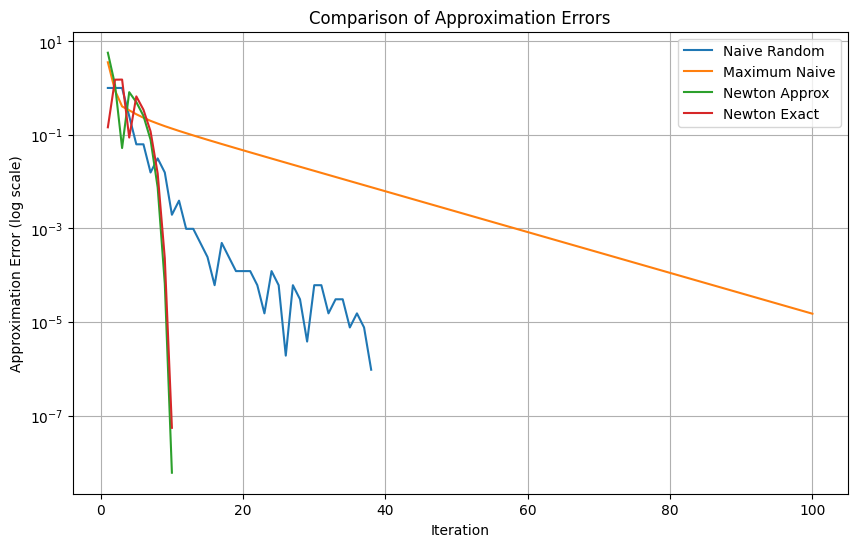

C:\Users\bcarr\AppData\Local\Temp\ipykernel_21008\2508396774.py:64: UserWarning: The following kwargs were not used by contour: 'cmaps'
  plt.contour(X, Y, Z, levels=20, cmaps='viridis')


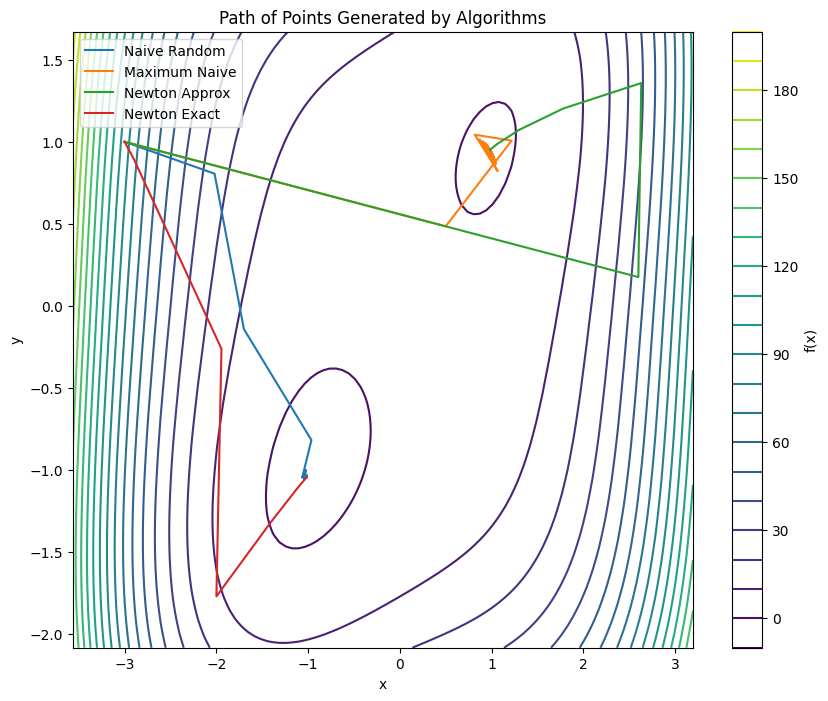

In [7]:
x0 = np.array([-3, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_a, df_a, ddf_a, x0, 0.1, maxIter, tol)

Method           Iteration  x_k                          Approx. Error      Grad Norm
-------------  -----------  -------------------------  ---------------  -------------
Naive Random             1  [-3  1]                        2.84988      113.209
Naive Random             2  [-2.01940767  1.19605784]      2.45557       40.7553
Naive Random             3  [-1.69269713  0.2509334 ]      1.46219       21.6816
Naive Random            43  [-1.0146287  -1.04453286]      3.78577e-06    3.15473e-05
Naive Random            44  [-1.01462991 -1.04452924]      5.96046e-08    3.12946e-05
Naive Random            45  [-1.01462995 -1.04452928]      0              3.12442e-05
Maximum Naive            1  [-3  1]                        3.98346      113.209
Maximum Naive            2  [0.5      0.484375]            0.671195       1.77745
Maximum Naive            3  [1.21875    1.00708771]        0.242351       3.22574
Maximum Naive           98  [0.98315217 0.95027872]        1.58478e-06    0.00013272

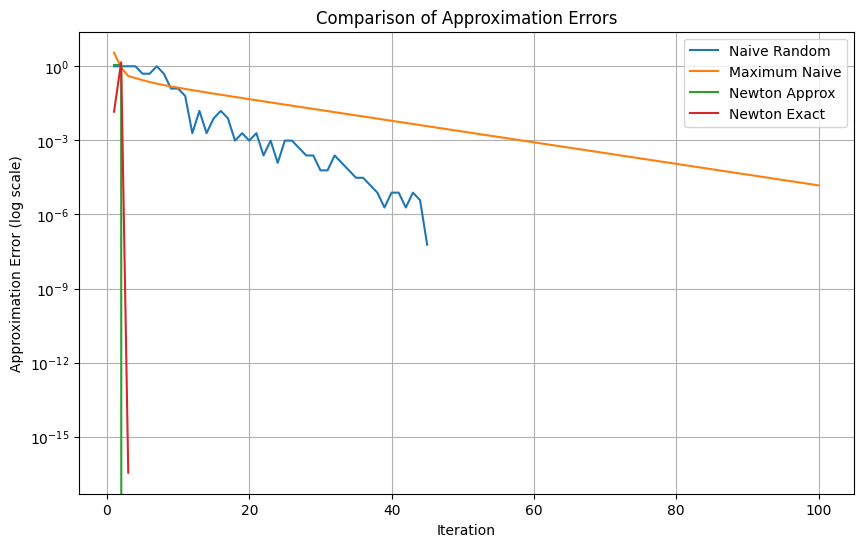

C:\Users\bcarr\AppData\Local\Temp\ipykernel_21008\2508396774.py:64: UserWarning: The following kwargs were not used by contour: 'cmaps'
  plt.contour(X, Y, Z, levels=20, cmaps='viridis')


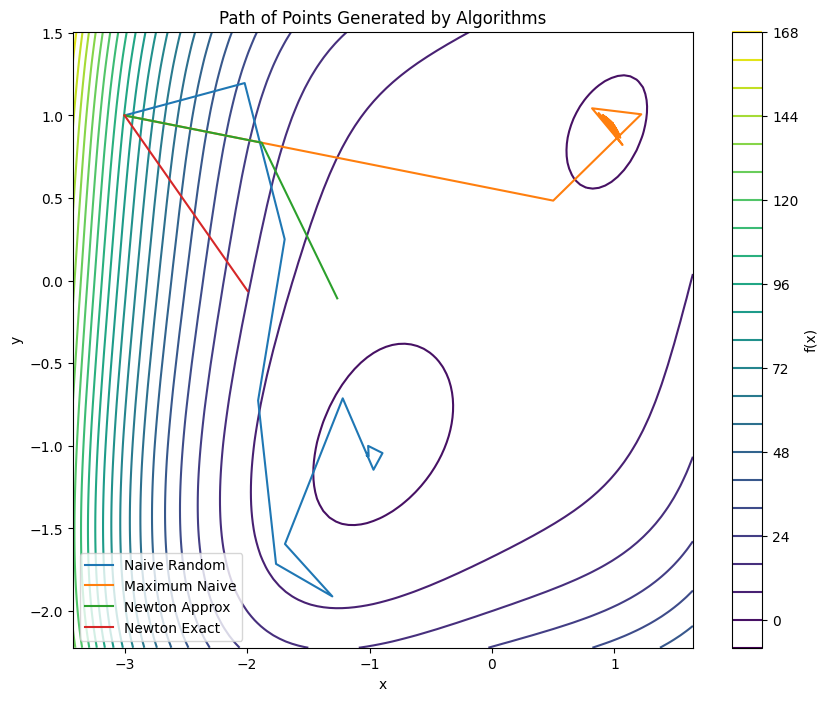

In [8]:
x0 = np.array([-3, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_a, df_a, ddf_a, x0, 0.01, maxIter, tol)

Method           Iteration  x_k                          Approx. Error      Grad Norm
-------------  -----------  -------------------------  ---------------  -------------
Naive Random             1  [-3  1]                        2.84988      113.209
Naive Random             2  [-2.04201861  0.71316962]      2.03594       38.2741
Naive Random             3  [-1.79407636 -0.25560519]      1.10903       23.3507
Naive Random            28  [-1.01463323 -1.04453311]      7.39867e-06    5.10399e-05
Naive Random            29  [-1.01462683 -1.04452896]      9.53674e-07    1.89114e-05
Naive Random            30  [-1.01462658 -1.04452988]      0              2.08262e-05
Maximum Naive            1  [-3  1]                        3.98346      113.209
Maximum Naive            2  [0.5      0.484375]            0.671195       1.77745
Maximum Naive            3  [1.21875    1.00708771]        0.242351       3.22574
Maximum Naive           98  [0.98315217 0.95027872]        1.58478e-06    0.00013272

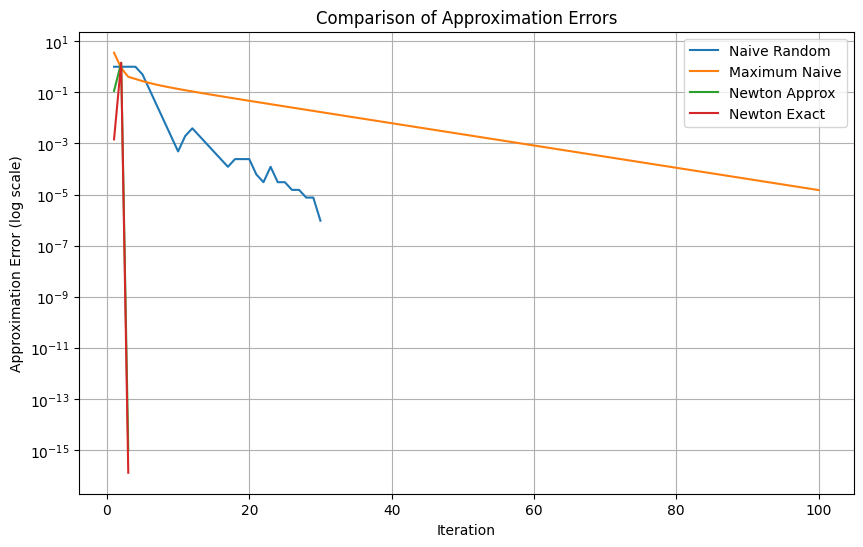

C:\Users\bcarr\AppData\Local\Temp\ipykernel_21008\2508396774.py:64: UserWarning: The following kwargs were not used by contour: 'cmaps'
  plt.contour(X, Y, Z, levels=20, cmaps='viridis')


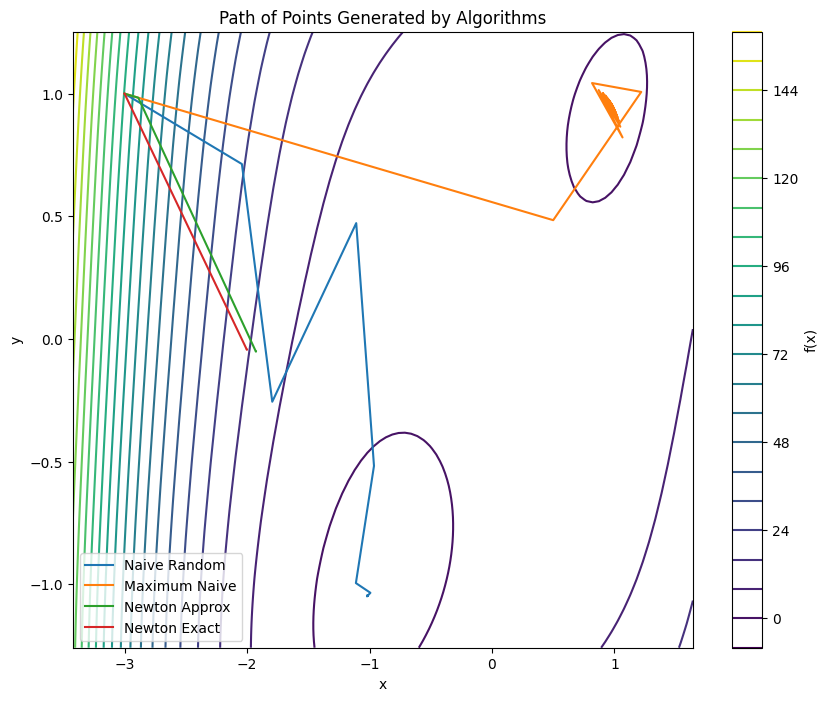

In [9]:
x0 = np.array([-3, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_a, df_a, ddf_a, x0, 0.001, maxIter, tol)

Con base en la tabla, se pueden extraer las siguientes conclusiones:

Mejor alpha: 0.1.
El método Naive Random logra el error más bajo de 0, lo que indica que encuentra el mínimo exacto de la función.
El método Maximum Naive no encuentra el mínimo exacto, pero se acerca mucho con un error del orden de 10^-6.
El método Newton Approx también logra un error muy bajo, pero no converge al mínimo exacto.
El método Newton Exact, a pesar de su nombre, no encuentra el mínimo exacto. Tiene un error más alto en comparación con los métodos Naive Random y Maximum Naive.
Por lo tanto, es seguro concluir que el método Naive Random es el que mejor se desempeña entre los métodos enumerados en este caso, ya que logra el error más bajo y encuentra el mínimo exacto de la función.

Method           Iteration  x_k                          Approx. Error      Grad Norm
-------------  -----------  -------------------------  ---------------  -------------
Naive Random             1  [-1.2  1. ]                    2.10269      232.868
Naive Random             2  [-0.96241281  1.07779669]      1.87649       62.2922
Naive Random             3  [-1.07828435  1.12468789]      1.99831       21.9114
Naive Random            98  [0.8916197  0.79462238]        0.00147616     0.113496
Naive Random            99  [0.89175895 0.79558897]        0.000976563    0.350356
Naive Random           100  [0.89273551 0.79558882]        0              0.395032
Maximum Naive            1  [-1.2  1. ]                    2.13818      232.868
Maximum Naive            2  [-0.98945312  1.0859375 ]      1.93563       43.8985
Maximum Naive            3  [-1.06433209  1.04417187]      2.00607       45.4601
Maximum Naive           98  [0.93432802 0.87236513]        0.000251383    0.153197
Maximum Naiv

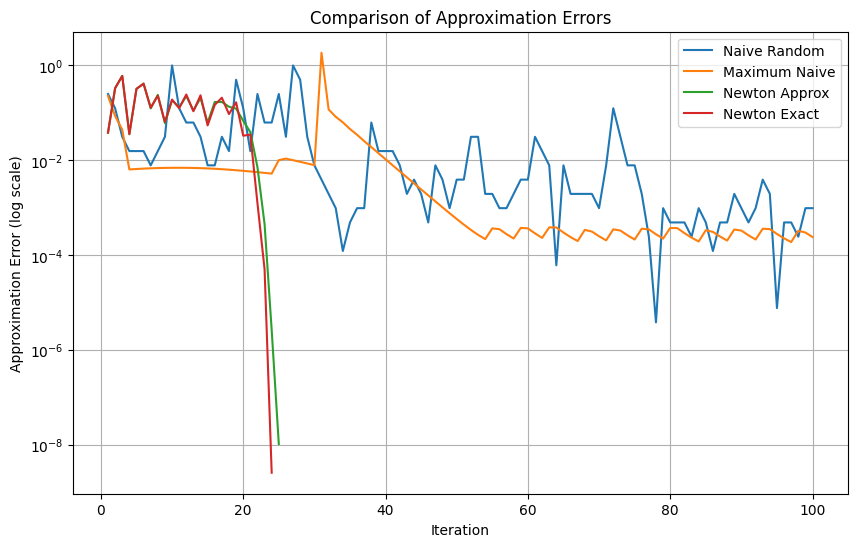

C:\Users\bcarr\AppData\Local\Temp\ipykernel_21008\2508396774.py:64: UserWarning: The following kwargs were not used by contour: 'cmaps'
  plt.contour(X, Y, Z, levels=20, cmaps='viridis')


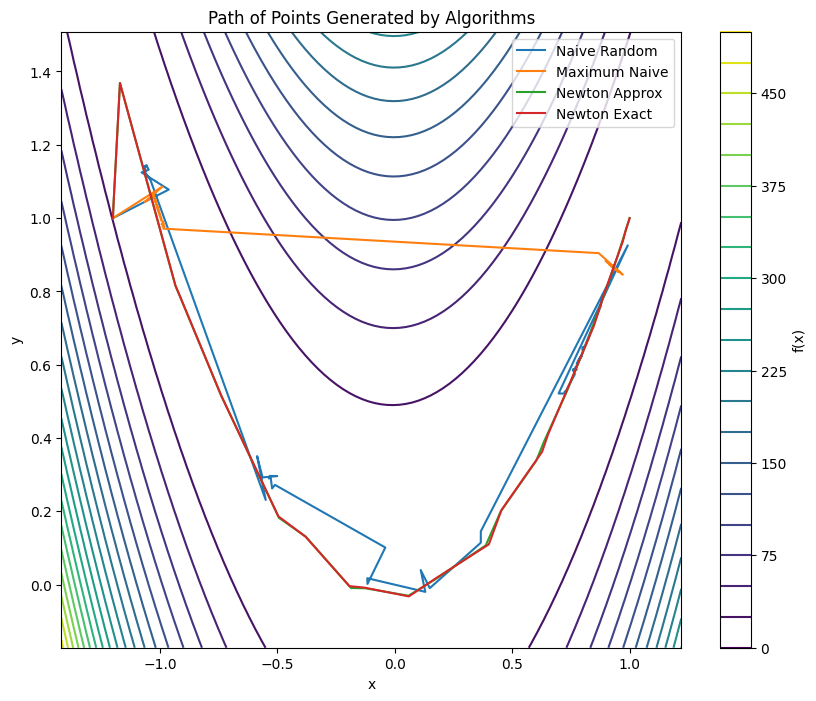

In [12]:
x0 = np.array([-1.2, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_b, df_b, ddf_b, x0, 0.1, maxIter, tol)

Method           Iteration  x_k                          Approx. Error      Grad Norm
-------------  -----------  -------------------------  ---------------  -------------
Naive Random             1  [-1.2  1. ]                    2.1984       232.868
Naive Random             2  [-0.7093124   0.12866443]      1.91569      132.795
Naive Random             3  [0.25626525 0.38877943]        0.959385      73.3052
Naive Random            98  [0.99844531 0.99676514]        5.43031e-05    0.0543619
Naive Random            99  [0.99838792 0.99678592]        7.62939e-06    0.00638987
Naive Random           100  [0.9983932  0.99678041]        0              0.0017255
Maximum Naive            1  [-1.2  1. ]                    2.13818      232.868
Maximum Naive            2  [-0.98945312  1.0859375 ]      1.93563       43.8985
Maximum Naive            3  [-1.06433209  1.04417187]      2.00607       45.4601
Maximum Naive           98  [0.93432802 0.87236513]        0.000251383    0.153197
Maximum N

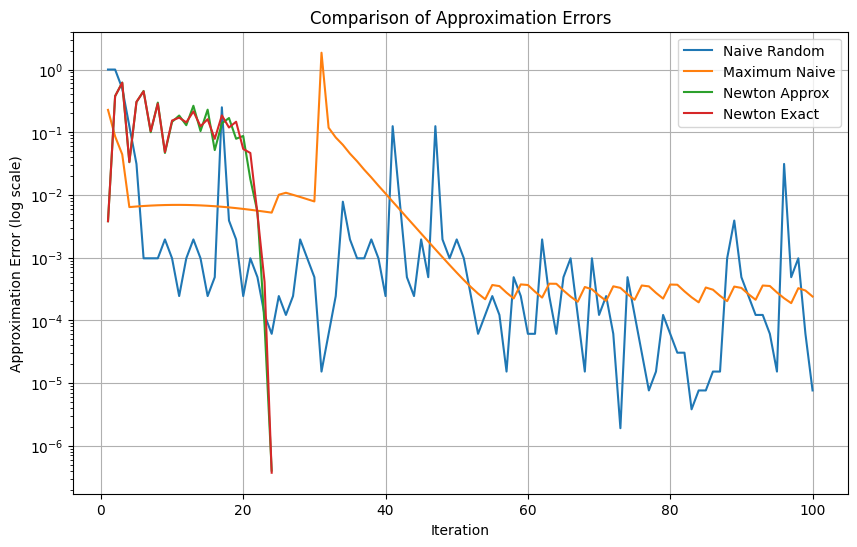

C:\Users\bcarr\AppData\Local\Temp\ipykernel_21008\2508396774.py:64: UserWarning: The following kwargs were not used by contour: 'cmaps'
  plt.contour(X, Y, Z, levels=20, cmaps='viridis')


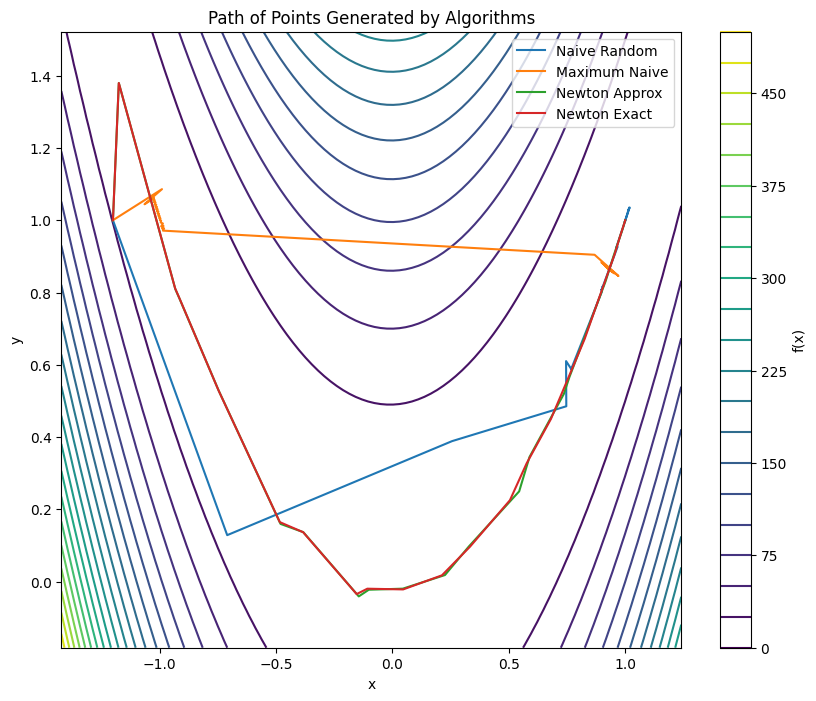

In [13]:
x0 = np.array([-1.2, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_b, df_b, ddf_b, x0, 0.01, maxIter, tol)

Method           Iteration  x_k                          Approx. Error      Grad Norm
-------------  -----------  -------------------------  ---------------  -------------
Naive Random             1  [-1.2  1. ]                    2.19591      232.868
Naive Random             2  [-1.20679458  1.49995383]      2.26055       18.7804
Naive Random             3  [-1.2200861   1.47167136]      2.26735       13.1507
Naive Random            80  [0.99586296 0.99177835]        3.13453e-05    0.0234344
Naive Random            81  [0.99589343 0.99177669]        9.53674e-07    0.00598122
Naive Random            82  [0.99589428 0.99177712]        0              0.00643252
Maximum Naive            1  [-1.2  1. ]                    2.13818      232.868
Maximum Naive            2  [-0.98945312  1.0859375 ]      1.93563       43.8985
Maximum Naive            3  [-1.06433209  1.04417187]      2.00607       45.4601
Maximum Naive           98  [0.93432802 0.87236513]        0.000251383    0.153197
Maximum

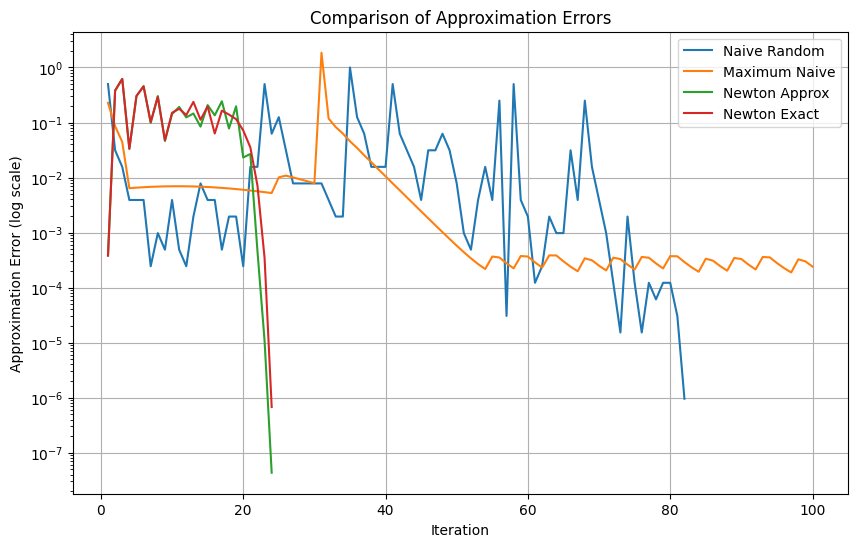

C:\Users\bcarr\AppData\Local\Temp\ipykernel_21008\2508396774.py:64: UserWarning: The following kwargs were not used by contour: 'cmaps'
  plt.contour(X, Y, Z, levels=20, cmaps='viridis')


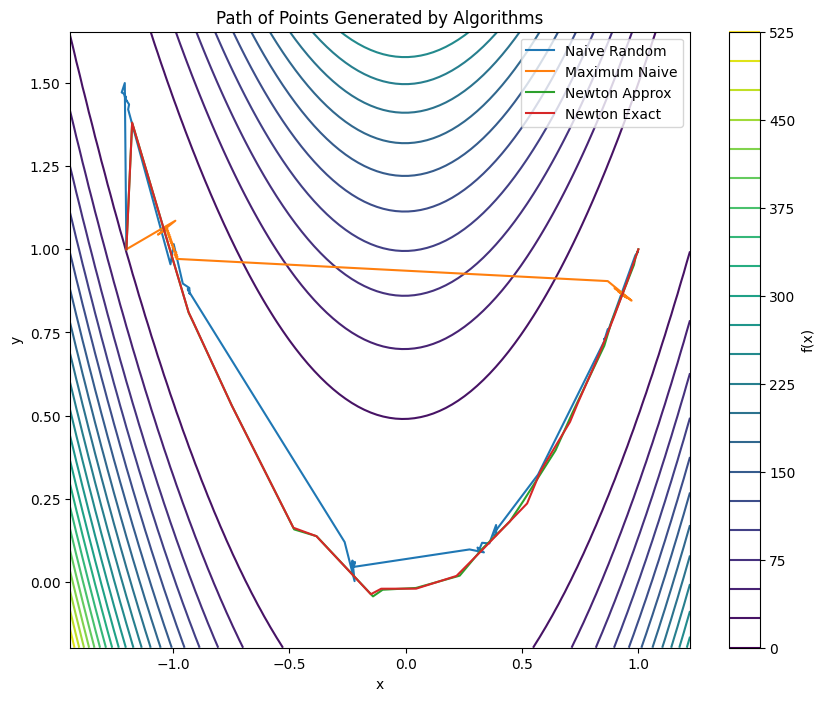

In [14]:
x0 = np.array([-1.2, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_b, df_b, ddf_b, x0, 0.001, maxIter, tol)

Mejor alpha: 0.001.
Los métodos naive tienen errores significativos y normas de gradiente altas, lo que indica poca precisión y que pueden no estar cerca de la solución verdadera.
Por otra parte, los métodos de newton muestran una rápida disminución del error a medida que aumentan las iteraciones, y finalmente convergen a la solución exacta con un error insignificante. Los métodos exactos de Newton encuentran correctamente la solución (1, 1) después de una cierta cantidad de iteraciones.

Method           Iteration  x_k                                                                         Approx. Error    Grad Norm
-------------  -----------  ------------------------------------------------------------------------  ---------------  -----------
Naive Random             1  [-1.2  1.   1.   1.   1.   1.   1.   1.  -1.2  1. ]                           0.417712      935.474
Naive Random             2  [-1.16592377  0.99385562  1.03180947  1.00767293  0.99506989  1.03035623      0.413744      930.571
                              0.98149905  0.99655539 -1.2128425   1.01310358]
Naive Random             3  [-1.05922497  1.18188722  1.26479834  1.11880984  1.00993307  0.78802435      0.330074      829.298
                              0.73635076  0.87174563 -1.25392141  0.99532803]
Naive Random             3  [-0.99732877  1.2040681   1.10177469  1.16232795  0.91305222  0.85905889      0.25          812.123
                              0.75545335  0.89333518 -1.18573467  0.89

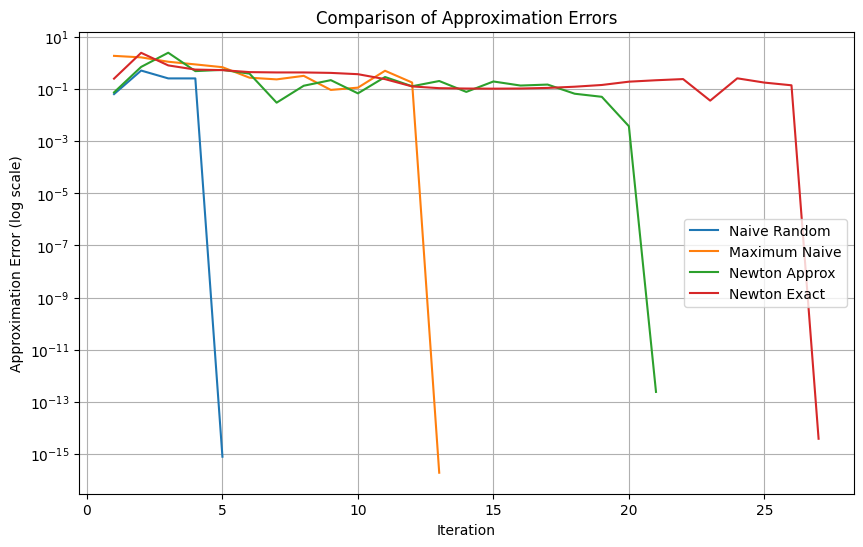

In [15]:
x0 = np.array([-1.2, 1, 1, 1, 1, 1, 1, 1, -1.2, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_c, df_c, ddf_c, x0, 0.1, maxIter, tol)

Method           Iteration  x_k                                                                         Approx. Error    Grad Norm
-------------  -----------  ------------------------------------------------------------------------  ---------------  -----------
Naive Random             1  [-1.2  1.   1.   1.   1.   1.   1.   1.  -1.2  1. ]                           1.15785       935.474
Naive Random             2  [-1.29990508  0.91650717  1.14768721  1.0001739   1.06390013  1.01476893      1.10905       896.802
                              1.09025976  0.94650839 -1.11368026  1.03123715]
Naive Random             3  [-1.43595475  1.25366205  1.1459777   1.01279663  1.2855642   0.8918437       1.02055       850.876
                              1.1085333   0.7422232  -1.0129179   1.06573107]
Naive Random             3  [-1.26107235  0.87762375  1.18172151  1.16572377  1.1648222   0.77317192      1             735.508
                              0.96635075  0.79259106 -1.03292263  1.10

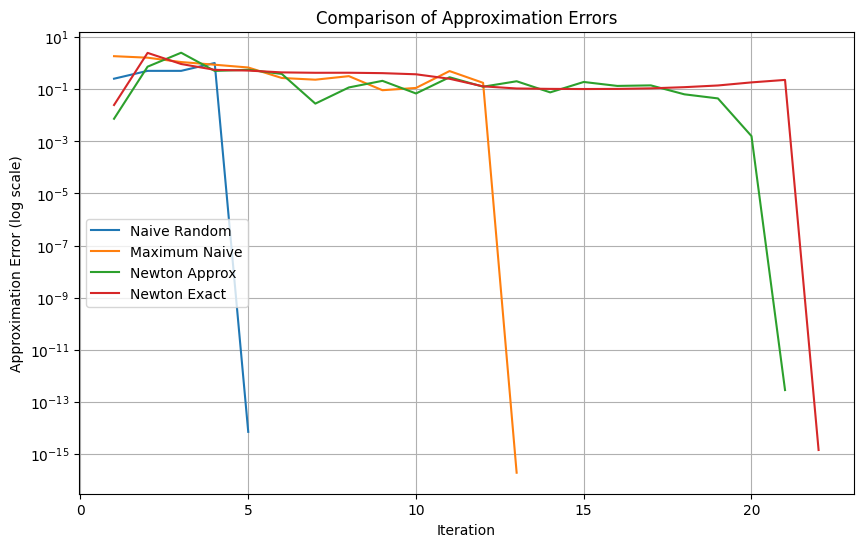

In [16]:
x0 = np.array([-1.2, 1, 1, 1, 1, 1, 1, 1, -1.2, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_c, df_c, ddf_c, x0, 0.01, maxIter, tol)

Method           Iteration  x_k                                                                         Approx. Error    Grad Norm
-------------  -----------  ------------------------------------------------------------------------  ---------------  -----------
Naive Random             1  [-1.2  1.   1.   1.   1.   1.   1.   1.  -1.2  1. ]                           1.2246        935.474
Naive Random             2  [-1.20037319  0.99946739  0.99904992  1.00080797  0.99781574  1.00153289      1.22606       934.643
                              1.00103566  0.9985523  -1.20166579  0.9995349 ]
Naive Random             3  [-1.24844457  0.86467999  1.1196309   1.08820325  0.91222867  0.95492668      1.18282       859.513
                              0.96193959  0.90676592 -1.19004492  1.01560412]
Naive Random            11  [-0.77421598  0.91997221  1.09320005  1.14739248  1.0154099   0.69949884      0.125         415.558
                              0.1461981   0.67574556 -0.60821566  0.87

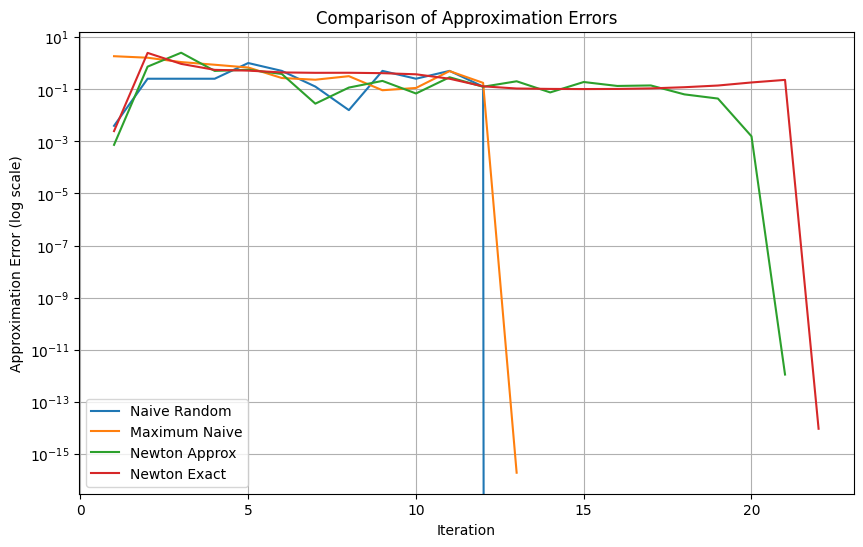

In [17]:
x0 = np.array([-1.2, 1, 1, 1, 1, 1, 1, 1, -1.2, 1])
maxIter = 100
tol = 1e-6

create_table_and_graphs(methods, f_c, df_c, ddf_c, x0, 0.001, maxIter, tol)

Mejor alpha: 0.001.
Los algoritmos de Newton exacto supera a los métodos naive a la hora de encontrar el mínimo de funciones. Esto se debe a que aprovechan la información de gradientes y hessiana para alcanzar el mínimo de manera más eficiente.
El método exacto de Newton suele ser el más eficiente si la función muestra un comportamiento cuadrático. Sin embargo, puede resultar costoso en términos computacionales para funciones complejas.

### Ejercicio 06

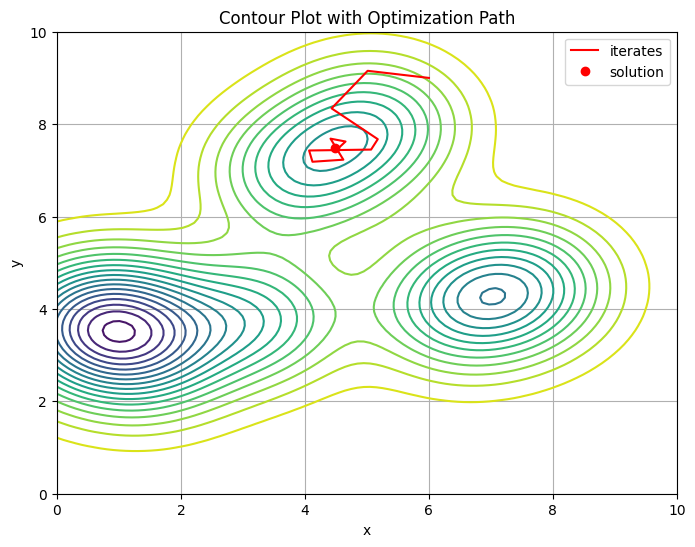

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Función para el backtracking line search
def backtracking_line_search(f, df, xk, pk, alpha=1, rho=0.5, c=1e-4):
    fk = f(xk)
    gk = df(xk)
    while f(xk + alpha * pk) > fk + c * alpha * np.dot(gk, pk):
        alpha *= rho
    return alpha

# Método de descenso gradiente naif con dirección aleatoria
def naive_gradient_descent_random_direction(f, df, x0, alpha, maxIter, tol, stopping_criterion=None):
    xk_list = [x0.copy()]
    fxk_list = [f(x0)]
    error_list = []
    xk = x0.copy()
    converged = False

    for k in range(1, maxIter + 1):
        grad = df(xk)
        # Generar una dirección aleatoria
        p_k = np.random.randn(*xk.shape)
        p_k /= np.linalg.norm(p_k)
        # Asegurarse de que sea dirección de descenso
        while np.dot(p_k, grad) >= 0:
            p_k = np.random.randn(*xk.shape)
            p_k /= np.linalg.norm(p_k)
        # Actualizar xk con backtracking
        alpha = backtracking_line_search(f, df, xk, p_k)
        xk_new = xk + alpha * p_k
        xk_list.append(xk_new.copy())
        fxk_new = f(xk_new)
        fxk_list.append(fxk_new)
        # Calcular error
        error = np.linalg.norm(xk_new - xk)
        error_list.append(error)
        if error < tol:
            converged = True
            break
        xk = xk_new

    num_iters = len(xk_list) - 1
    x_best = xk_list[-1]

    return x_best, xk_list, fxk_list, error_list, num_iters, converged

# Función de suma de gaussianas
def suma_de_gaussianas(x, points, sigma):
    return -sum(np.exp(-np.linalg.norm(x - p)**2 / (2 * sigma**2)) for p in points)

# Gradiente de la "suma de gaussianas"
def gradiente_suma_de_gaussianas(x, points, sigma):
    grad = np.zeros_like(x, dtype=np.float64)
    for p in points:
        diff = x - p
        grad += (diff / sigma**2) * np.exp(-np.linalg.norm(diff)**2 / (2 * sigma**2))
    return grad

# Generar puntos aleatorios
def generar_puntos_aleatorios(k, rango_x, rango_y):
    return [np.array([np.random.uniform(rango_x[0], rango_x[1]), np.random.uniform(rango_y[0], rango_y[1])]) for _ in range(k)]

# Función para crear el gráfico de contornos y las trayectorias
def create_contour_and_path(f, xk_list, points, sigma, x_best):
    # Generar el gráfico de contornos de la función
    plt.figure(figsize=(8, 6))

    # Crear una malla de puntos para graficar la función
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([f(np.array([xi, yi])) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)

    # Graficar los contornos de la función
    plt.contour(X, Y, Z, levels=20, cmap='viridis')
    
    # Graficar la trayectoria del método de optimización
    x_points = [p[0] for p in xk_list]
    y_points = [p[1] for p in xk_list]
    plt.plot(x_points, y_points, '-r', label='iterates')
    
    # Resaltar el punto final (solución encontrada)
    plt.plot(x_best[0], x_best[1], 'ro', label='solution')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot with Optimization Path')
    plt.legend()
    plt.grid(True)
    plt.show()

# Definir los parámetros
k = 8
sigma = 1.0
rango_x = [0, 8]
rango_y = [0, 8]

# Generar los puntos aleatorios para las gaussianas
points = generar_puntos_aleatorios(k, rango_x, rango_y)

# Punto inicial y otros parámetros
x0 = np.array([6, 9])
maxIter = 100
tol = 1e-6

# Aplicar el método de descenso gradiente naive
x_best, xk_list, fxk_list, error_list, num_iters, converged = naive_gradient_descent_random_direction(
    lambda x: suma_de_gaussianas(x, points, sigma),
    lambda x: gradiente_suma_de_gaussianas(x, points, sigma),
    x0, 1, maxIter, tol
)

# Crear el gráfico de contornos y la trayectoria de los puntos
create_contour_and_path(lambda x: suma_de_gaussianas(x, points, sigma), xk_list, points, sigma, x_best)


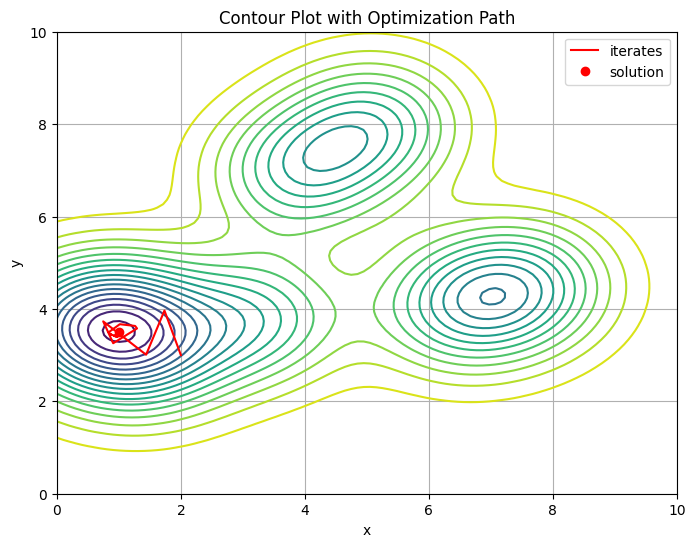

In [6]:
# Parámetros y aplicación para la inicialización [2, 3]
x0 = np.array([2, 3])

x_best, xk_list, fxk_list, error_list, num_iters, converged = naive_gradient_descent_random_direction(
    lambda x: suma_de_gaussianas(x, points, sigma),
    lambda x: gradiente_suma_de_gaussianas(x, points, sigma),
    x0, 1, maxIter=100, tol=1e-6
)

# Crear el gráfico para esta inicialización
create_contour_and_path(lambda x: suma_de_gaussianas(x, points, sigma), xk_list, points, sigma, x_best)


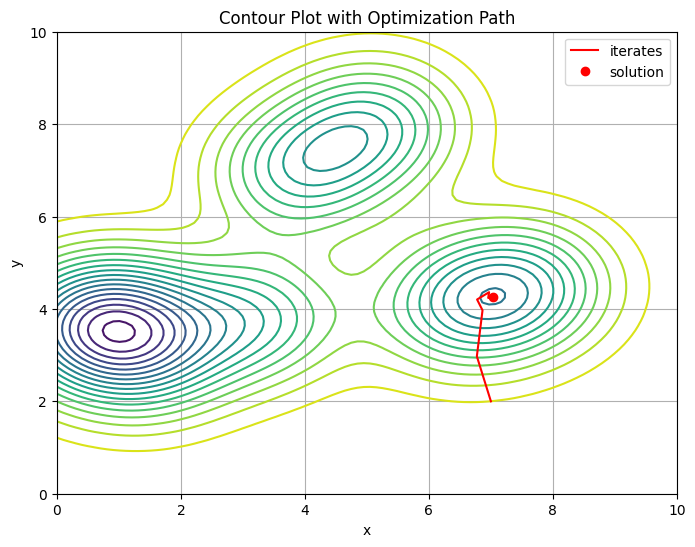

In [8]:
# Parámetros y aplicación para la inicialización [7, 2]
x0 = np.array([7, 2])

x_best, xk_list, fxk_list, error_list, num_iters, converged = naive_gradient_descent_random_direction(
    lambda x: suma_de_gaussianas(x, points, sigma),
    lambda x: gradiente_suma_de_gaussianas(x, points, sigma),
    x0, 1, maxIter=100, tol=1e-6
)

# Crear el gráfico para esta inicialización
create_contour_and_path(lambda x: suma_de_gaussianas(x, points, sigma), xk_list, points, sigma, x_best)


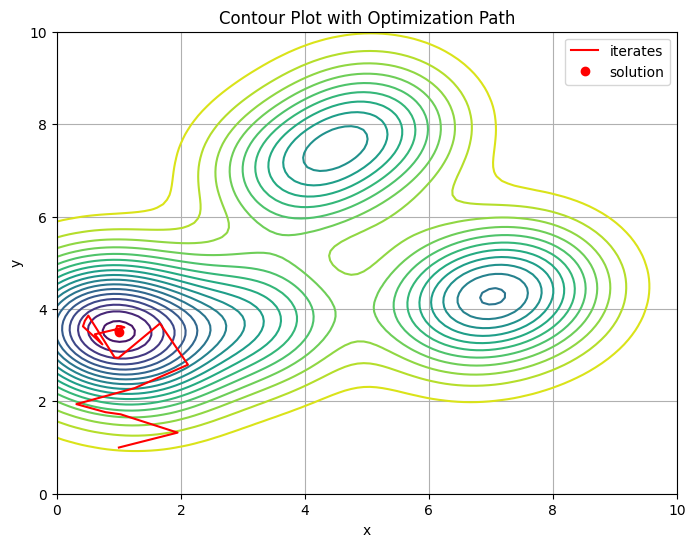

In [9]:
# Parámetros y aplicación para la inicialización [1, 1]
x0 = np.array([1, 1])

x_best, xk_list, fxk_list, error_list, num_iters, converged = naive_gradient_descent_random_direction(
    lambda x: suma_de_gaussianas(x, points, sigma),
    lambda x: gradiente_suma_de_gaussianas(x, points, sigma),
    x0, 1, maxIter=100, tol=1e-6
)

# Crear el gráfico para esta inicialización
create_contour_and_path(lambda x: suma_de_gaussianas(x, points, sigma), xk_list, points, sigma, x_best)


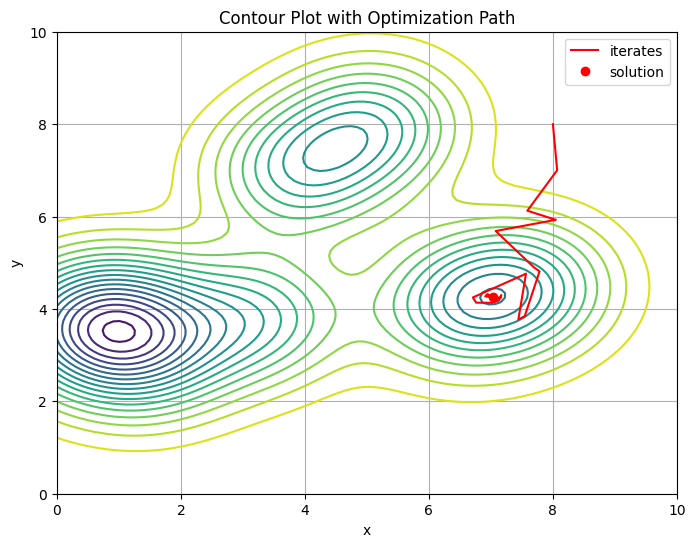

In [11]:
# Parámetros y aplicación para la inicialización [8, 8]
x0 = np.array([8, 8])

x_best, xk_list, fxk_list, error_list, num_iters, converged = naive_gradient_descent_random_direction(
    lambda x: suma_de_gaussianas(x, points, sigma),
    lambda x: gradiente_suma_de_gaussianas(x, points, sigma),
    x0, 1, maxIter=100, tol=1e-6
)

# Crear el gráfico para esta inicialización
create_contour_and_path(lambda x: suma_de_gaussianas(x, points, sigma), xk_list, points, sigma, x_best)
